In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.optimize import minimize

# Irradiance Data

In [2]:
# Read the irradiance data from the CSV file
dfIrr2 = pd.read_csv('March52025_8uvb8uva.csv', skiprows=[1])
dfIrr2.columns = ['AbsoluteIrradiance:245', 'Unnamed: 1']

# Round the wavelengths to the nearest whole number
dfIrr2['rounded_wavelength'] = dfIrr2['AbsoluteIrradiance:245'].round()

dfIrr2.loc[dfIrr2['rounded_wavelength'] < 280, 'Unnamed: 1'] = 0

# Filter the DataFrame to include only wavelengths from 200 to 800
filtered_df1 = dfIrr2[(dfIrr2['rounded_wavelength'] >= 200) & (dfIrr2['rounded_wavelength'] <= 800)]

# Group by the rounded wavelengths and calculate the average irradiance
average_irradiance2 = filtered_df1.groupby('rounded_wavelength')['Unnamed: 1'].mean().reset_index()

# Rename the columns for clarity
average_irradiance2.columns = ['wavelength', 'average_irradiance']

Irr2=average_irradiance2['average_irradiance']
wavelengthIrr=average_irradiance2['wavelength']

#UNIT CONVERSION: Starting in µW*cm-2*nm-1 converting to mmolphotons*cm-2*s-1*nm-1
c=3*10**8 #m/s
h=6.626*10**-34 #J s
Na=6.023*10**23 #mol^-1

Irr2=Irr2/10E3 #µW to W
Irr2=(Irr2*wavelengthIrr*10E-10)/(h*c*Na)

Irr2=Irr2.astype(float)
wavelengthIrr=wavelengthIrr.astype(float)
I_rel2=Irr2/np.sum(Irr2)

In [3]:
# Read the data from the CSV file
dfIrr2 = pd.read_csv('March52025_8uvb8uva.csv', skiprows=[1])
dfIrr2.columns = ['AbsoluteIrradiance:211', 'Unnamed: 1']

# Round the wavelengths to the nearest whole number
dfIrr2['rounded_wavelength'] = dfIrr2['AbsoluteIrradiance:211'].round()

dfIrr2.loc[dfIrr2['rounded_wavelength'] < 280, 'Unnamed: 1'] = 0

# Filter the DataFrame to include only wavelengths from 200 to 800
filtered_df1 = dfIrr2[(dfIrr2['rounded_wavelength'] >= 200) & (dfIrr2['rounded_wavelength'] <= 800)]

# Group by the rounded wavelengths and calculate the average irradiance
average_irradiance2 = filtered_df1.groupby('rounded_wavelength')['Unnamed: 1'].mean().reset_index()

# Rename the columns for clarity
average_irradiance2.columns = ['wavelength', 'average_irradiance']

Irr2=average_irradiance2['average_irradiance']
wavelengthIrr=average_irradiance2['wavelength']

Irr2=Irr2.astype(float)
wavelengthIrr=wavelengthIrr.astype(float)
I_rel2=Irr2/np.sum(Irr2)

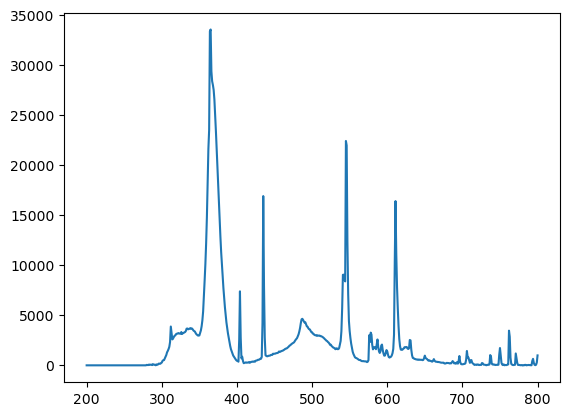

In [4]:
plt.plot(wavelengthIrr,Irr2)

# 2NB Actinometry

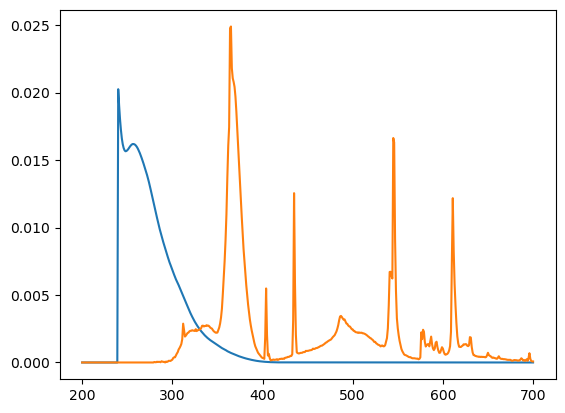

In [5]:
#First you will need to upload your csv file to this server
df = pd.read_csv('../intercomparison.csv')
wavelength_2NB=df['λ (nm)']
E2NB=df['2NB E']
E2NB=E2NB[:501]
wavelength_2NB=wavelength_2NB[:501]

I_rel_sub=I_rel2[:501]
I_rel_sub=I_rel_sub[::-1]

plt.plot(wavelength_2NB,E2NB/np.sum(E2NB))
plt.plot(wavelength_2NB,I_rel_sub)

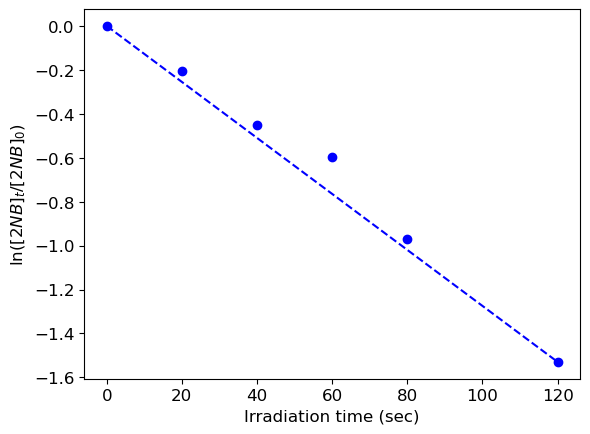

In [6]:
times=np.array([0,20,40,60,80,120]) 
deg=[157.4, 128, 100.4, 86.6, 59.6, 34.1]
deglog=np.log([i/deg[0] for i in deg])
kobs_2NB=-(np.polyfit(times,deglog,1)[0])
#Plot the results
plt.plot(times,deglog,'bo')
plt.plot(times,times*(-kobs_2NB),'b--')

#Plot legend and axis labels
#plt.legend(fontsize=14)
plt.ylabel('ln(${[2NB]_t}$/${[2NB]_0}$)',fontsize=12)
plt.xlabel('Irradiation time (sec)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('2NB_decay')
plt.show()

In [7]:
quantum2NB=0.41
def optimize_scaling_factor(quantum2NB, E2NB, I_rel_sub, known_value):
    """
    Optimize the scaling factor to match the known action_spectra value.

    Parameters:
        quantum2NB: Quantum yield.
        E2NB (pandas.Series or np.ndarray): Molar absorptivity data.
        I_rel_sub (pandas.Series or np.ndarray): Relative intensity data.
        known_value (float): The known action_spectra value to match.

    Returns:
        float: The optimal scaling factor.
    """
    # Reset index and ensure inputs are numpy arrays for better performance
    quantum2NB = quantum2NB
    E2NB = E2NB
    I_rel_sub = I_rel_sub.reset_index(drop=True).values

    # Objective function to minimize the error
    def objective(scaling_factor):
        action_spectra = 2.303 * scaling_factor * quantum2NB * E2NB * I_rel_sub
        error = np.abs(np.sum(action_spectra) - known_value)  # Minimize absolute error
        return error

    # Initial guess for the scaling factor
    initial_guess = 1.0

    # Perform the optimization
    result = minimize(objective, initial_guess, method='Nelder-Mead',tol=1e-10)

    if result.success:
        optimal_scaling_factor = result.x[0]
        
        # Calculate the optimized action_spectra with the optimal scaling factor
        optimized_action_spectra = 2.303 * optimal_scaling_factor * quantum2NB * E2NB * I_rel_sub
        optimized_value = np.sum(optimized_action_spectra)

        # Print the known and optimized values for confirmation
        print(f"Known value: {known_value}")
        print(f"Optimized action_spectra value: {optimized_value}")

        return optimal_scaling_factor
    else:
        raise ValueError("Optimization failed: " + result.message)

# Example usage:
scaling_factor = optimize_scaling_factor(quantum2NB, E2NB, I_rel_sub, kobs_2NB)
#print(f"Optimized scaling factor: {scaling_factor}")
#print(kobs_2NB)

Known value: 0.012745644619451027
Optimized action_spectra value: 0.012745644680647622


In [8]:
I_abs_2NB=I_rel2.reset_index(drop=True)*scaling_factor

In [9]:
c=3*10**8 #m/s
h=6.626*10**-34 #J s
Na=6.023*10**23 #mol^-1
#np.save('UBC_UVB_Irr1.npy',I_abs_2NB/1000) #save in mol photons cm^-2 s^-1 nm^-1
print('I_abs_2NB=',np.sum(I_abs_2NB.reset_index(drop=True)*h*c*Na*10**10/wavelengthIrr.reset_index(drop=True)),'W m^2')

I_abs_2NB= 197.65500197359472 W m^2


# Calculate Quantum yields using absolute irradiance

In [10]:
df1 = pd.read_csv('March62025_intercompall.csv', skiprows=[1]) #change the name of the csv file to the name of the file you imported

#Note: It's weird, but when reading in the csv file to python, it sometimes auto-names the samples to "unnamed: #" 
#extract absorbances (remember that because of the layout of the csv file the absorbances will sometimes be 
#named "Unnamed: x (odd number). Just check that you are indexing the correct names when assigning variables
blank=df1['Unnamed: 9']
PN_abs = df1['Unnamed: 7']
RB_abs = df1['Unnamed: 1'] 
Lig_abs = df1['Unnamed: 3']
Jug_abs = df1['Unnamed: 5']
wavelength=df1['blank']

PN_abs=PN_abs-blank
RB_abs=RB_abs-blank
Lig_abs=Lig_abs-blank
Jug_abs=Jug_abs-blank

PN_abs=PN_abs-np.mean(PN_abs[0:100])
RB_abs=RB_abs-np.mean(RB_abs[0:100])
Lig_abs=Lig_abs-np.mean(Lig_abs[0:100])
Jug_abs=Jug_abs-np.mean(Jug_abs[0:100])

#change all absorbances to type 'float' for ease of calculations 
RB_abs=RB_abs.astype(float)
PN_abs=PN_abs.astype(float)
Lig_abs=Lig_abs.astype(float)
Jug_abs=Jug_abs.astype(float)
wavelength=wavelength.astype(float)

RB_abs[RB_abs < 0] = 0
PN_abs[PN_abs < 0] = 0
Lig_abs[Lig_abs < 0] = 0
Jug_abs[Jug_abs < 0] = 0

wavelength=wavelength[::-1]
PN_abs=PN_abs[::-1]
RB_abs=RB_abs[::-1]
Lig_abs=Lig_abs[::-1]
Jug_abs=Jug_abs[::-1]

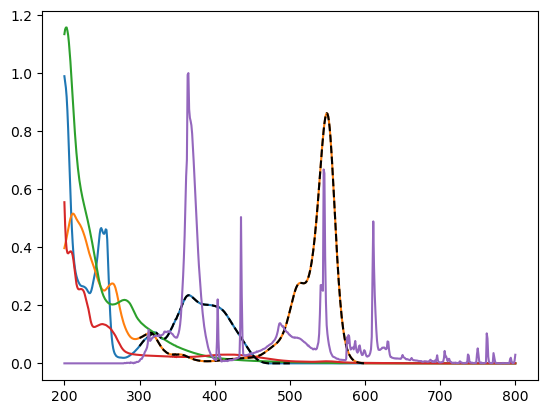

In [11]:
#plt.plot(wavelength,I_abs_2NB/np.max(I_abs_2NB))
plt.plot(wavelength,PN_abs)
plt.plot(wavelength,RB_abs)
plt.plot(wavelength,Lig_abs)
plt.plot(wavelength,Jug_abs)

plt.plot(wavelength[100:301],PN_abs[100:301],'--k')
plt.plot(wavelength[100:401],RB_abs[100:401],'--k')

plt.plot(wavelength,I_abs_2NB/np.max(I_abs_2NB))

In [12]:
##### Change times to match your times of sampling
timesR=np.array([0, 1, 2, 3, 5, 7, 10])*60
PNtime=np.array([0, 0.5, 1, 1.5, 2, 3, 5])*60 #put in times and convert to seconds
times=np.array([0, 10, 15, 30, 70, 130, 190])*60
timesL=np.array([0, 10, 15, 30, 70, 130, 190])*60

#Put in HPLC Results Here
RB=[53.2, 44, 38.1, 31.9, 21.5, 16, 8.7] 
PN=[63, 53.5, 47.4, 41.2, 35.2, 25.7, 13] 
Lig=[59.3, 58.9, 58.5, 56.5, 52.8, 48.1, 44.9] 
Jug=[60.9, 59.3, 58.9, 56.2, 51.2, 46.2, 42.7]

#Don't worry, np.log is the natural logorithm, not base 10 (np.log10 is base 10)
RBlog=np.log([i/RB[0] for i in RB])
PNlog=np.log([i/PN[0] for i in PN])
Liglog=np.log([i/Lig[0] for i in Lig])
Juglog=np.log([i/Jug[0] for i in Jug])

kobsRB=-(np.polyfit(timesR,RBlog,1)[0])
kobsPN=-(np.polyfit(PNtime,PNlog,1)[0])
kobsLig=-(np.polyfit(timesL,Liglog,1)[0])
kobsJug=-(np.polyfit(times,Juglog,1)[0])


In [13]:
blanktime=np.array([0, 5, 10, 15, 30, 70, 130, 190])*60
blank=[59.2, 60, 60, 59.7, 59, 59.3, 59.9, 57.8, 59.7]

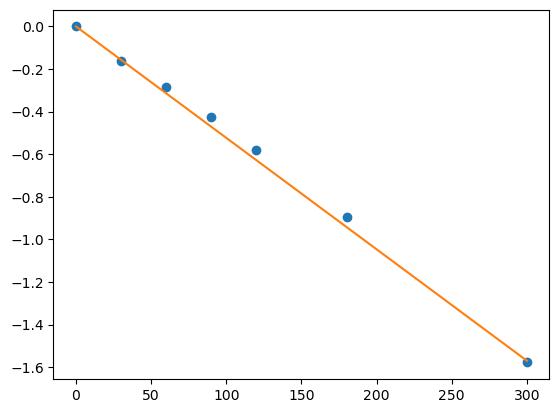

In [14]:
#plt.plot(timesR,RBlog,'o')
#plt.plot(timesR,-kobsRB*timesR)

plt.plot(PNtime,PNlog,'o')
plt.plot(PNtime,-kobsPN*PNtime)

#plt.plot(times,Juglog,'o')
#plt.plot(times,-kobsJug*times)

#plt.plot(timesL,Liglog,'o')
#plt.plot(timesL,-kobsLig*timesL)

# Calculate screening factor and Rate of light absorbance

# Using 2NB actinometry

In [15]:
#First subset absorbance to only include where there is irradiation 
alpha_PN=PN_abs[100:401]
alpha_RB=RB_abs[100:401]

I_2NB_sf=I_abs_2NB[100:401]

################################################################################
sf_PN=(np.sum((1-10**-alpha_PN.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))/(np.sum((2.303*alpha_PN.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))
print('PN Screening Factor = ',sf_PN)

sf_RB=(np.sum((1-10**-alpha_RB.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))/(np.sum((2.303*alpha_RB.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))
print('RB Screening Factor = ',sf_RB)

################################################################################
R_abs_PN=2.303*np.sum(PN_abs.reset_index(drop=True)*I_abs_2NB.reset_index(drop=True))
print('R_abs PN =',R_abs_PN)

R_abs_RB=2.303*np.sum(RB_abs.reset_index(drop=True)*I_abs_2NB.reset_index(drop=True))
print('R_abs RB =',R_abs_RB)



PN Screening Factor =  0.797414578302828
RB Screening Factor =  0.5982504936564871
R_abs PN = 1.7995456295312898e-05
R_abs RB = 1.930540055337796e-05


In [16]:
Temp=22
krxn=10**8 + (2.1E6*(Temp-22)) #from Appaini (2017)
kd=934.1813872772475*Temp + 258405.55551958136

kcorr_PN=kobsPN/sf_PN 
quantum_PN=(kcorr_PN*kd)/(R_abs_PN*krxn)
print('PN Quantum yield=',quantum_PN*100)

kcorr_RB=kobsRB/sf_RB
quantum_RB=(kcorr_RB*kd)/(R_abs_RB*krxn)
print('RB Quantum yield=',quantum_RB*100)

PN Quantum yield= 101.74197634761325
RB Quantum yield= 72.17425620117436


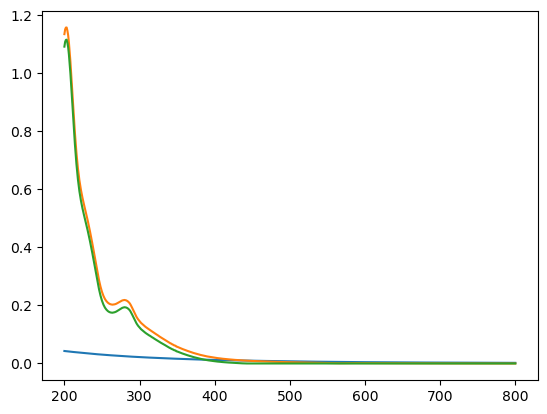

In [21]:
import miepython

# === Parameters for lignin nanoparticles ===
radius_m = 142e-9 # particle size 
n_medium = 1.33              # Refractive index of water 
n_particle = 1.61            # Approximate refractive index for lignin
path_length = 1e-2           # 1 cm cuvette path length
particle_concentration = 1.18e13  # particles/m^3 (Guess)

#Paul B says in his paper he used 10mg/mL. I use 20mg/mL so I can essentially double his concentrations 


# === Convert wavelengths to meters ===
wavelengths_m = wavelength * 1e-9

# === Calculate size parameter and relative index ===
x_vals = 2 * np.pi * radius_m * n_medium / wavelengths_m
m = n_particle / n_medium

# === Calculate Mie scattering cross sections using miepython ===
qsca_vals = []
for x in x_vals:
    # Use the correct method to get the scattering efficiencies
    qext, qsca, qback, g = miepython.efficiencies_mx(m, x)  # Correct method call
    qsca_vals.append(qsca)

qsca_vals = np.array(qsca_vals)

# === Compute scattering cross-section and absorbance ===
area = np.pi * radius_m**2
scattering_cross_section = qsca_vals * area  # m^2 per particle
scattering_abs = scattering_cross_section * particle_concentration * path_length
scattering_absorbance = 2.303 * scattering_abs

Lig_abs_corr=Lig_abs-scattering_absorbance
Lig_abs_corr[Lig_abs_corr < 0] = 0
plt.plot(wavelength,scattering_absorbance)
plt.plot(wavelength,Lig_abs)
plt.plot(wavelength,Lig_abs_corr)
Lig_abs=Lig_abs_corr

In [23]:
#First subset absorbance to only include where there is irradiation 
alpha_Lig=Lig_abs[100:201]
alpha_Jug=Jug_abs[100:201]

I_2NB_sf=I_abs_2NB[100:201]

################################################################################
sf_Lig=(np.sum((1-10**-alpha_Lig.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))/(np.sum((2.303*alpha_Lig.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))
print('Lig Screening Factor = ',sf_Lig)

sf_Jug=(np.sum((1-10**-alpha_Jug.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))/(np.sum((2.303*alpha_Jug.reset_index(drop=True))*I_2NB_sf.reset_index(drop=True)))
print('Jug Screening Factor = ',sf_Jug)

################################################################################
R_abs_Lig=2.303*np.sum(Lig_abs.reset_index(drop=True)*I_abs_2NB.reset_index(drop=True))
print('R_abs Lig =',R_abs_Lig)

R_abs_Jug=2.303*np.sum(Jug_abs.reset_index(drop=True)*I_abs_2NB.reset_index(drop=True))
print('R_abs Jug =',R_abs_Jug)

Lig Screening Factor =  0.9481669969761971
Jug Screening Factor =  0.9735589427754507
R_abs Lig = 2.9356293482928456e-06
R_abs Jug = 2.630408500471378e-06


In [24]:
Temp=22
krxn=10**8 + (2.1E6*(Temp-22)) #from Appaini (2017)
kd=934.1813872772475*Temp + 258405.55551958136

kcorr_Lig=kobsLig/sf_Lig
quantum_Lig=(kcorr_Lig*kd)/(R_abs_Lig*krxn)
print('Lig Quantum yield=',quantum_Lig*100)

kcorr_Jug=kobsJug/sf_Jug
quantum_Jug=(kcorr_Jug*kd)/(R_abs_Jug*krxn)
print('Jug Quantum yield=',quantum_Jug*100)

Lig Quantum yield= 2.555364329677398
Jug Quantum yield= 3.4506999212429887


In [19]:
print('QY RB Relative=',(kcorr_RB/R_abs_RB)*(R_abs_PN/kcorr_PN))
print('QY Lig Relative=',(kcorr_Lig/R_abs_Lig)*(R_abs_PN/kcorr_PN))
print('QY Jug Relative=',(kcorr_Jug/R_abs_Jug)*(R_abs_PN/kcorr_PN))

QY RB Relative= 0.7093852389360185
QY Lig Relative= 0.016585388933538673
QY Jug Relative= 0.033916187252479475


In [20]:
print('RB_SS=',kcorr_RB/krxn)
print('PN_SS=',kcorr_PN/krxn)
print('Lig_SS=',kcorr_Jug/krxn)
print('Jug_SS=',kcorr_Lig/krxn)

RB_SS= 4.9948565485573713e-11
PN_SS= 6.563340245693851e-11
Lig_SS= 3.253810672725925e-13
Jug_SS= 2.7277294789092117e-13
